In [1]:
import cv2
import albumentations as A
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader

from sds_playground.datasets import CATARACTSDataset
from sds_playground.utils import denormalize

In [3]:
train_ds = CATARACTSDataset(
    root='/local/scratch/CATARACTS-videos-processed/',
    resize_shape=(128, 128),
    crop_shape=None,
    normalize=(.5, .5),
    random_hflip=False,
    random_brightness_contrast=False,
    mode='train',
    sample_img=True,
    frame_step=5,
    n_seq_frames=1,
    overlapping_seq_chunks=False,
    remove_idle=False,
)
train_dl = DataLoader(train_ds, shuffle=True, batch_size=16)

In [5]:
val_ds = CATARACTSDataset(
    root='/local/scratch/CATARACTS-videos-processed/',
    resize_shape=(128, 128),
    crop_shape=None,
    normalize=(.5, .5),
    random_hflip=False,
    random_brightness_contrast=False,
    mode='val',
    sample_img=True,
    frame_step=5,
    n_seq_frames=1,
    overlapping_seq_chunks=False,
    remove_idle=False,
)
val_dl = DataLoader(val_ds, shuffle=True, batch_size=16)

In [6]:
test_ds = CATARACTSDataset(
    root='/local/scratch/CATARACTS-videos-processed/',
    resize_shape=(128, 128),
    crop_shape=None,
    normalize=(.5, .5),
    random_hflip=False,
    random_brightness_contrast=False,
    mode='test',
    sample_img=True,
    frame_step=5,
    n_seq_frames=1,
    overlapping_seq_chunks=False,
    remove_idle=False,
)
test_dl = DataLoader(test_ds, shuffle=True, batch_size=16)

In [7]:
print("Total: ", len(train_ds) + len(test_ds) + len(val_ds))
print("Train: ", len(train_ds))
print("Val: ", len(val_ds))
print("Test: ", len(test_ds))

Total:  95789
Train:  49487
Val:  10810
Test:  35492


In [8]:
img, _, _, phase_label, tool_label = next(iter(train_dl))

In [9]:
print(f"{train_ds.num_tool_classes=}")
print(f"{train_ds.num_phases_classes=}")

train_ds.num_tool_classes=21
train_ds.num_phases_classes=19


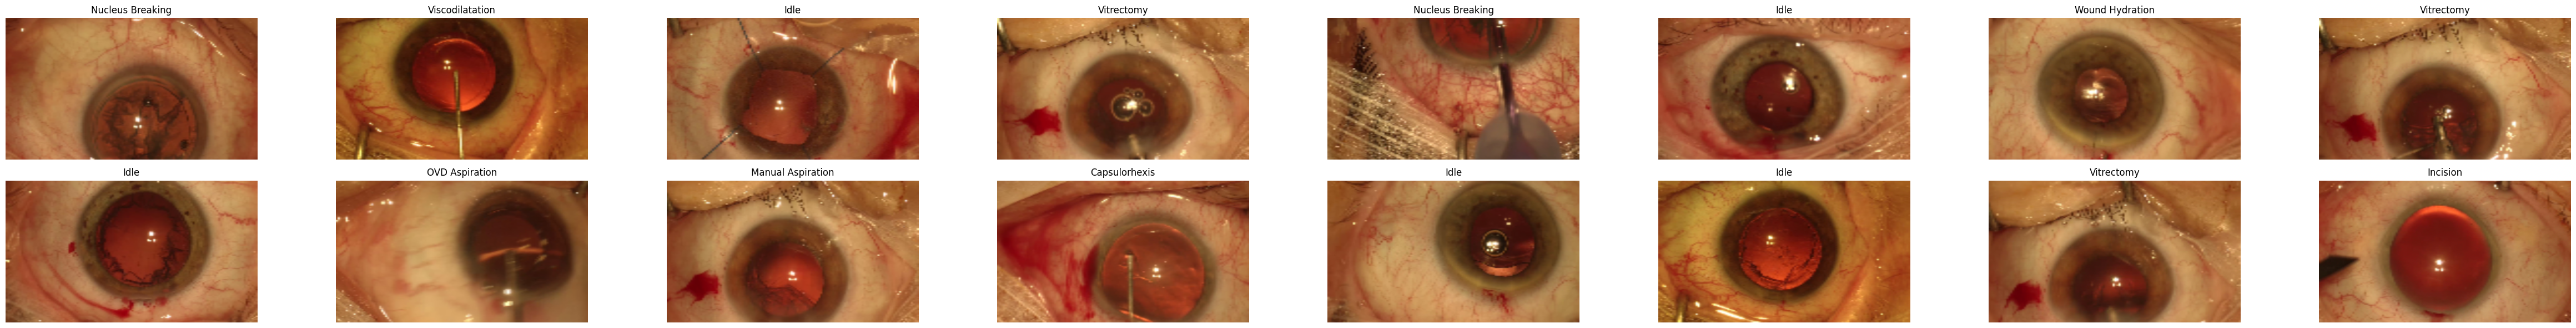

In [16]:
fig, ax = plt.subplots(2, img.shape[0]//2, figsize=(img.shape[0]*3, 2*3))
_img = F.interpolate(img, train_ds.original_shape[1:], mode='bilinear')
for n in range(img.shape[0]//2):
    ax[0, n].imshow(denormalize(_img[n], .5, .5).permute(1, 2, 0).cpu().numpy())
    ax[0, n].axis('off')
    ax[0, n].set_title(train_ds.phase_label_names[phase_label[n].item()])
    k = n + img.shape[0]//2
    ax[1, n].imshow(denormalize(_img[k], .5, .5).permute(1, 2, 0).cpu().numpy())
    ax[1, n].axis('off')
    ax[1, n].set_title(train_ds.phase_label_names[phase_label[k].item()])
plt.tight_layout()
plt.autoscale()
plt.show()

In [31]:
train_ds = CATARACTSDataset(
    root='/local/scratch/CATARACTS-videos-processed/',
    resize_shape=(128, 128),
    crop_shape=None,
    normalize=(.5, .5),
    random_hflip=False,
    random_brightness_contrast=False,
    mode='train',
    sample_img=True,
    frame_step=3,
    n_seq_frames=10,
    overlapping_seq_chunks=True,
    remove_idle=True,
)
train_dl = DataLoader(train_ds, shuffle=True, batch_size=4)

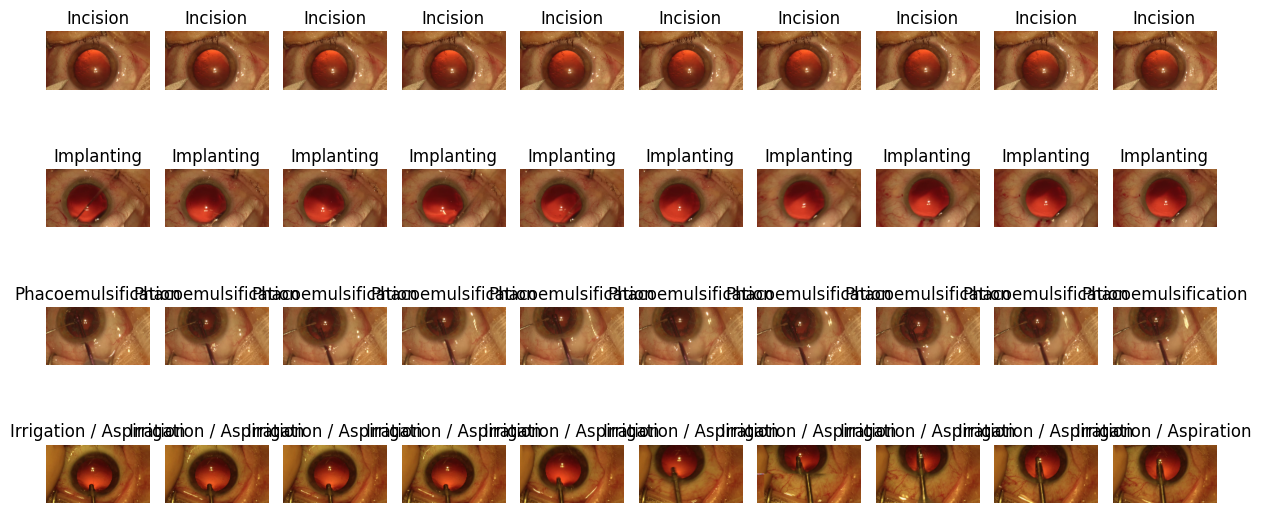

In [32]:
img, _, _, phase_label, tool_label = next(iter(train_dl))
N, T, C, H, W = img.shape
fig, ax = plt.subplots(N, T, figsize=(img.shape[0]*3, 2*3))
_img = F.interpolate(img.reshape(N*T, C, H, W), train_ds.original_shape[1:], mode='bilinear').reshape(N, T, C, *train_ds.original_shape[1:])
for n in range(N):
    for t in range(T):
        ax[n, t].imshow(denormalize(_img[n, t], .5, .5).permute(1, 2, 0).cpu().numpy())
        ax[n, t].axis('off')
        ax[n, t].set_title(train_ds.phase_label_names[phase_label[n, t].item()])
plt.tight_layout()
plt.autoscale()
plt.show()